In [168]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [169]:
onecall = True  # 8 days
#onecall = False # 5 days

In [170]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [171]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [172]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [173]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,14/08,06:42,21:08,17:39,00:19,0.31,"{'day': 24.54, 'min': 19.35, 'max': 29.11, 'ni...","{'day': 24.56, 'night': 25.35, 'eve': 27.36, '...",1013,58,15.74,3.36,279,6.74,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,1,9.13,5.99
1,15/08,06:43,21:06,18:45,00:58,0.34,"{'day': 27.31, 'min': 20.64, 'max': 29.81, 'ni...","{'day': 27.21, 'night': 24.83, 'eve': 27.86, '...",1018,42,13.22,3.61,286,5.92,"[{'id': 800, 'main': 'Clear', 'description': '...",4,0,NaN,5.91
2,16/08,06:45,21:04,19:39,01:51,0.38,"{'day': 25.12, 'min': 20.55, 'max': 26.96, 'ni...","{'day': 24.73, 'night': 22.04, 'eve': 27.05, '...",1016,40,10.61,4.47,290,5.37,"[{'id': 501, 'main': 'Rain', 'description': 'm...",80,1,2.86,5.75
3,17/08,06:46,21:02,20:20,03:01,0.41,"{'day': 25.55, 'min': 18.83, 'max': 26.98, 'ni...","{'day': 25.2, 'night': 20.17, 'eve': 24.95, 'm...",1014,40,10.85,3.97,350,6.27,"[{'id': 500, 'main': 'Rain', 'description': 'l...",87,1,2.54,5.34
4,18/08,06:48,21:01,20:51,04:23,0.45,"{'day': 22.33, 'min': 17.12, 'max': 24.24, 'ni...","{'day': 21.64, 'night': 19.22, 'eve': 21.98, '...",1014,39,7.81,4.19,347,5.61,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,0,NaN,4.10
5,19/08,06:49,20:59,21:15,05:52,0.50,"{'day': 25.36, 'min': 16.37, 'max': 27.23, 'ni...","{'day': 24.66, 'night': 22.66, 'eve': 26.09, '...",1015,27,5.07,3.06,238,6.25,"[{'id': 800, 'main': 'Clear', 'description': '...",2,0,NaN,5.00
6,20/08,06:50,20:57,21:34,07:22,0.52,"{'day': 20.73, 'min': 17.24, 'max': 25.06, 'ni...","{'day': 20.76, 'night': 19.07, 'eve': 21.92, '...",1014,73,15.45,5.56,303,9.22,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1,2.88,5.00
7,21/08,06:52,20:55,21:50,08:49,0.56,"{'day': 23.41, 'min': 15.96, 'max': 24.61, 'ni...","{'day': 22.56, 'night': 19.41, 'eve': 22.51, '...",1022,29,4.54,3.06,307,6.02,"[{'id': 800, 'main': 'Clear', 'description': '...",5,0,NaN,5.00


In [174]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [175]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            15/08
sunrise       06:43
sunset        21:06
moonrise      18:45
moonset       00:58
moon_phase     0.34
pressure       1018
humidity         42
dew_point     13.22
wind_speed     3.61
wind_deg        286
wind_gust      5.92
pop               0
rain            NaN
uvi            5.91
Name: 1, dtype: object

In [176]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [177]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        14/08
sunrise                                                   06:42
sunset                                                    21:08
moonrise                                                  17:39
moonset                                                   00:19
moon_phase                                                 0.31
temp          {'day': 24.54, 'min': 19.35, 'max': 29.11, 'ni...
feels_like    {'day': 24.56, 'night': 25.35, 'eve': 27.36, '...
pressure                                                   1013
humidity                                                     58
dew_point                                                 15.74
wind_speed                                                 3.36
wind_deg                                                    279
wind_gust                                                  6.74
weather       [{'id': 501, 'main': 'Rain', 'description': 'm...
clouds                      

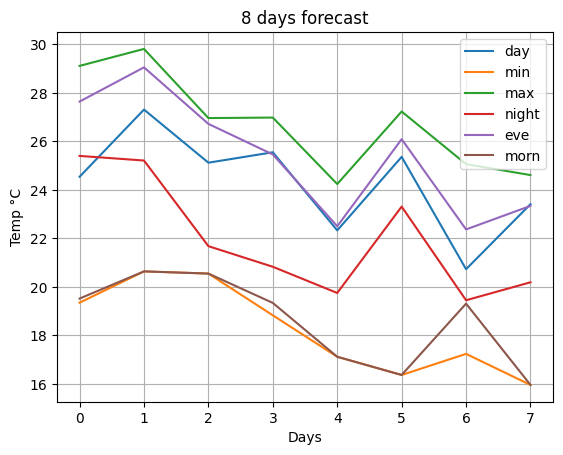

In [178]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [179]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1723626000, 'main': {'temp': 20.71, 'feels_like': 20.98, 'temp_min': 20.71, 'temp_max': 24.33, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 1004, 'humidity': 82, 'temp_kf': -3.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 1.43, 'deg': 243, 'gust': 2.55}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-14 09:00:00'}, {'dt': 1723636800, 'main': {'temp': 23.09, 'feels_like': 23.2, 'temp_min': 23.09, 'temp_max': 27.84, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 1004, 'humidity': 67, 'temp_kf': -4.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 2.47, 'deg': 253, 'gust': 2.94}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-14 12:00:00'}, {'dt': 1723647600, 'main': {'temp':

In [180]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1723626000
main          {'temp': 20.71, 'feels_like': 20.98, 'temp_min...
weather       [{'id': 804, 'main': 'Clouds', 'description': ...
clouds                                             {'all': 100}
wind                  {'speed': 1.43, 'deg': 243, 'gust': 2.55}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-14 09:00:00
rain                                                        NaN
Name: 0, dtype: object


In [181]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [182]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date','date','time','temp_max','temp_min']])


     human_date   date   time  temp_max  temp_min
0   14/08 11:00  14/08  11:00     24.33     20.71
1   14/08 14:00  14/08  14:00     27.84     23.09
2   14/08 17:00  14/08  17:00     28.70     26.04
3   14/08 20:00  14/08  20:00     27.18     27.18
4   14/08 23:00  14/08  23:00     25.40     25.40
5   15/08 02:00  15/08  02:00     23.22     23.22
6   15/08 05:00  15/08  05:00     21.43     21.43
7   15/08 08:00  15/08  08:00     20.73     20.73
8   15/08 11:00  15/08  11:00     24.51     24.51
9   15/08 14:00  15/08  14:00     28.38     28.38
10  15/08 17:00  15/08  17:00     29.81     29.81
11  15/08 20:00  15/08  20:00     28.05     28.05
12  15/08 23:00  15/08  23:00     25.21     25.21
13  16/08 02:00  16/08  02:00     23.01     23.01
14  16/08 05:00  16/08  05:00     21.37     21.37
15  16/08 08:00  16/08  08:00     20.95     20.95
16  16/08 11:00  16/08  11:00     25.06     25.06
17  16/08 14:00  16/08  14:00     25.54     25.54
18  16/08 17:00  16/08  17:00     25.45     25.45


In [183]:
_5days['human_date']

0     14/08 11:00
1     14/08 14:00
2     14/08 17:00
3     14/08 20:00
4     14/08 23:00
5     15/08 02:00
6     15/08 05:00
7     15/08 08:00
8     15/08 11:00
9     15/08 14:00
10    15/08 17:00
11    15/08 20:00
12    15/08 23:00
13    16/08 02:00
14    16/08 05:00
15    16/08 08:00
16    16/08 11:00
17    16/08 14:00
18    16/08 17:00
19    16/08 20:00
20    16/08 23:00
21    17/08 02:00
22    17/08 05:00
23    17/08 08:00
24    17/08 11:00
25    17/08 14:00
26    17/08 17:00
27    17/08 20:00
28    17/08 23:00
29    18/08 02:00
30    18/08 05:00
31    18/08 08:00
32    18/08 11:00
33    18/08 14:00
34    18/08 17:00
35    18/08 20:00
36    18/08 23:00
37    19/08 02:00
38    19/08 05:00
39    19/08 08:00
Name: human_date, dtype: object

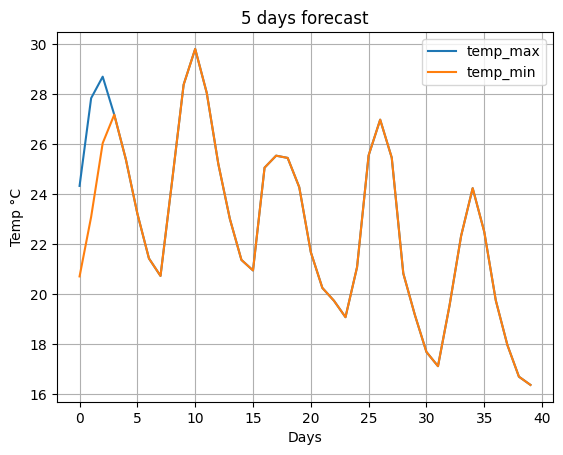

In [184]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()
    

In [185]:
# pip install seaborn

In [186]:
df2 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df2

,human_date,temp_max,temp_min
0,14/08 11:00,24.33,20.71
1,14/08 14:00,27.84,23.09
2,14/08 17:00,28.70,26.04
3,14/08 20:00,27.18,27.18
4,14/08 23:00,25.40,25.40
5,15/08 02:00,23.22,23.22
6,15/08 05:00,21.43,21.43
7,15/08 08:00,20.73,20.73
8,15/08 11:00,24.51,24.51
9,15/08 14:00,28.38,28.38


In [187]:
df2 = df2.set_index('human_date')
df2

,temp_max,temp_min
human_date,,
14/08 11:00,24.33,20.71
14/08 14:00,27.84,23.09
14/08 17:00,28.70,26.04
14/08 20:00,27.18,27.18
14/08 23:00,25.40,25.40
15/08 02:00,23.22,23.22
15/08 05:00,21.43,21.43
15/08 08:00,20.73,20.73
15/08 11:00,24.51,24.51


[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

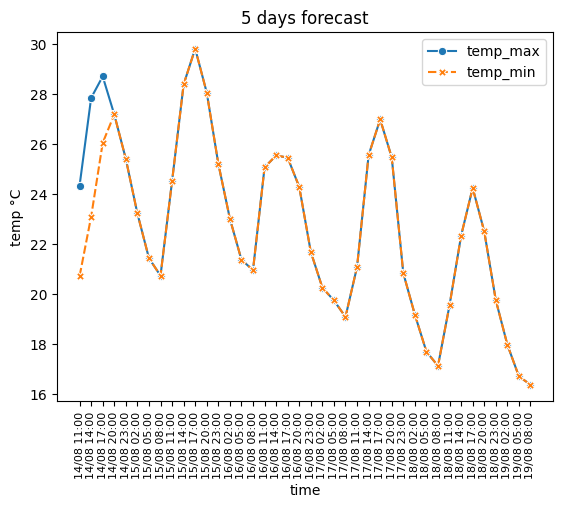

In [188]:
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time', ylabel='temp °C', title='5 days forecast') 